# Numerical exercises 10
____________________

From shell, inside _this_ directory:
- to compile: `make`;
- to run the first exercise: `./ex1.sh`;
- to run the second exercise: `./ex1.sh`.

<span style="color:red"> **NB: `MPI` [libraries](https://www.open-mpi.org/) need to be installed to run the second program!** </span>

To run the second program independently, run from shell, inside `ex10.2` directory:

`mpirun --use-hwthread-cpus  ./main [Npop] [Ngen] [shape]`

More info on the parameters in the `README`.
_____________________

In [69]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

In this exercise we go on studying the Travelling Salesman Problem by approaching it with two different methods and comparing the results with those obtained with the Genetic Algorithm.


## Exercise 10.1: Simulated annealing & TSP problem
_______________________

The first way we choose to tackle the problem is the **Simulated Annealing (SA)** approach. The analogy comes from thermodynamics, where when a system is slowly cooled down, it reaches its state of minimum energy. The cooling must be slow, to avoid the system to freeze in local minimum points of the energy landscape and preserve ergodicity.

To embed our optimization problem in this statistical physics we need to sample the Boltzmann distribution:

$$
p(x)= \frac{e^{-\beta L(x)}}{Z}, \\
$$

where $L(x)$ is the loss function defined in `exercise09` and here it plays the role of an energy to be minimized. We will slowly cool down our system by progressively increasing the $\beta$ value while progressing with the Monte Carlo steps (we set a schedule $\{ (\beta_1, n_1); ...; (\beta_N, n_N) \}$ of $N$ temperatures $\beta_i$ and MC steps $n_i$). We initialize the algorithm on a configuration $\vec x_0$ and accept or reject the following configurations with the following probability, to be sampled with Metropolis Algorithm:

$$
P= \begin{cases}
      e^{-\beta (L(\vec x') -L(\vec x))}, & \text{if } L(\vec x') > L(\vec x)  \\
      1, & \text{otherwise.}
    \end{cases}
$$

Each of the $N$ cycles will start from the final configuration of the previous one.

### Notes on the code

To implement the Simulated Annealing algorithm we added a method `SimulatedAnnealing` to the `SalesMan` class. It accepts by reference another `SalesMan` object of which the loss function will be minimized using the procedure above described.

To be sure to compare the Genetic Algorithm and the Simulated Annealing algorithm on the same city coordinates our program runs also the genetic algorithm procedure and prints the results of it. In the main we set the coordinates of the `SalesMan` objects to be the same as the coordinates randomly generated for the `Population`object that we used to obtain the Genetic Algorthm results.

### Comments on the results

We show below the final results of our program. The parameters we used are also specified. We chose to consider $\beta \in [1, 500]$ for both of the cases and: 
- $n_{\text{moves}} = 1500$ steps for each temperature in the square case; 
- $n = 100$ steps for each temperature in the circumference case;

In the square case the convergence to the correct result with SA is comparable to the one of the GA: 
- with **SA** we reach the convergence at $\beta \sim 400$ which means after having evaluated $400 * n_{\text{moves}}= 6*10^{5}$ salesmen; 
- with the **GA** we reach it after $100$ generations, that is after the evaluation of $100*n_{\text{pop}}=10^5$ salesmen.

In the circumference case the convergence to the correct result with SA is much better than the one of the GA: 
- with **SA** we reach the convergence at $\beta \sim 500$ which means after having evaluated $500 * n_{\text{moves}}= 10^{4}$ salesmen; 

- with the **GA** we reach it after $100$ generations, that is after the evaluation of $100*n_{\text{pop}}=10^5$ salesmen.

The plots represent the paths and the distances values in function of $\beta$ obtained in the square an circumference case using the Simulated Annealing technique.

In [112]:
shape = ('square', 'circumference')
for i in range(2) : 
    res = open("./ex10.1/results/results_"+shape[i]+".txt", "r")
    data = res.read()
    print(data)

------------------------------
Genetic Algortithm
32 cities on a square;
Population of 1000 salesmen;
Evolution of 200 generations. 

Best Initial loss value: 25.6488
Best final loss value: 9.85561
------------------------------
Simulated Annealing
32 cities on a square;
500 temperatures to be considered;
1500 steps to be made for each temperature. 

Initial loss value: 35.4166
Final loss value: 9.85561

------------------------------
Genetic Algortithm
32 cities on a circumference;
Population of 1000 salesmen;
Evolution of 200 generations. 

Best Initial loss value: 28.0603
Best final loss value: 6.21109
------------------------------
Simulated Annealing
32 cities on a circumference;
500 temperatures to be considered;
100 steps to be made for each temperature. 

Initial loss value: 41.9986
Final loss value: 6.21109



In [105]:
def path(shape) :
    x,y = (np.genfromtxt('./ex10.1/results/cities_'+shape+ '.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplots(figsize=(12,6))
    plt.subplot(1,2,1)
    if  shape == 'circumference' :
        theta=np.linspace(0,2.*3.141593,num=200)    
        sinn=np.sin(theta); coss=np.cos(theta)
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=0)
    plt.title('Initial SalesMan\'s Path ')

    x,y = (np.genfromtxt('./ex10.1/results/cities_final_'+ shape +'.dat', usecols=i, autostrip=True) for i in range(2))
    plt.subplot(1,2,2)
    plt.plot(x,y, '*-', markersize=8, label='Path')
    if  shape == 'circumference' :
        plt.plot(coss,sinn,color='k',linewidth=0.4)
    plt.plot(x[0],y[0],'*', markersize=10, label='Start')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Final SalesMan\'s Path')
    plt.legend(loc=0)

    plt.suptitle('Path evolution on '+shape)
    plt.tight_layout()
    plt.show()

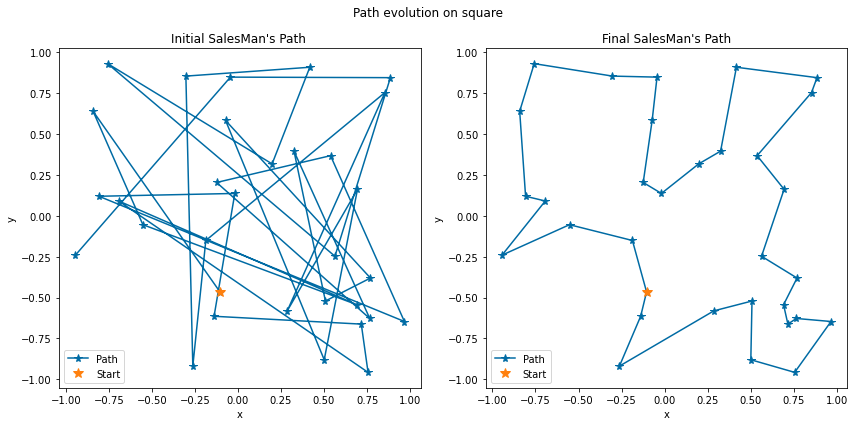

In [106]:
path('square')

In [113]:
def loss(shape):
    generation, fitness = (np.genfromtxt('./ex10.1/results/loss_'+shape+'.dat', usecols=i, autostrip=True) for i in range(2))

    fig,ax=plt.subplots(figsize=(12,5))
    plt.plot(generation, fitness, '-',linewidth=1.5, label="Simulated Annealing's length")
    if shape=='square' : 
        plt.axhline(y=9.85561,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
    elif shape== 'circumference' :
        plt.axhline(y= 6.21109,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
    plt.xlabel('$β$')
    plt.ylabel(r'$\langle L_1\rangle$')
    plt.title('Progression of length estimation for path on a '+shape)
    plt.legend(loc=1)
    plt.grid(True)

    axins=inset_axes(ax,5.6,2.8,loc=1)
    axins.plot(generation, fitness, 'o-',markersize=3, label="Simulated Annealing's length")
    if shape=='square' : 
        axins.axhline(y=9.85561,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
        axins.set_xlim(0, 100)
        axins.set_ylim(9, 13)
    elif shape== 'circumference' :
        axins.set_xlim(400, 450)
        axins.axhline(y=6.21109,linewidth=1.5,linestyle='--', color='orange',label="Genetic Algorithm's length")
        axins.set_ylim(6, 7.5)
    plt.grid(True)
    plt.legend(loc=1)
    plt.yticks(visible=True)
    plt.xticks(visible=True)
    mark_inset(ax,axins,loc1=3,loc2=4,fc='none',ec='0.6')

    plt.show()

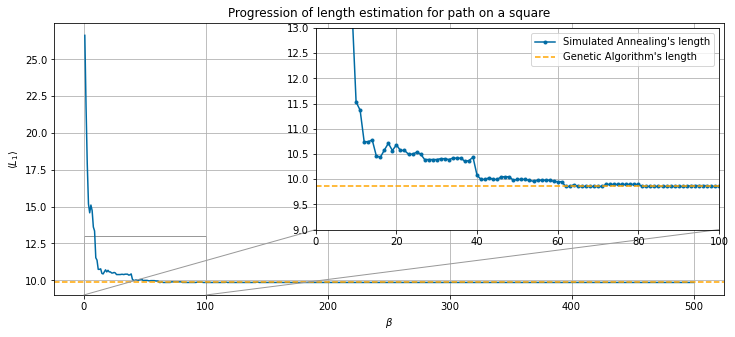

In [110]:
loss('square')

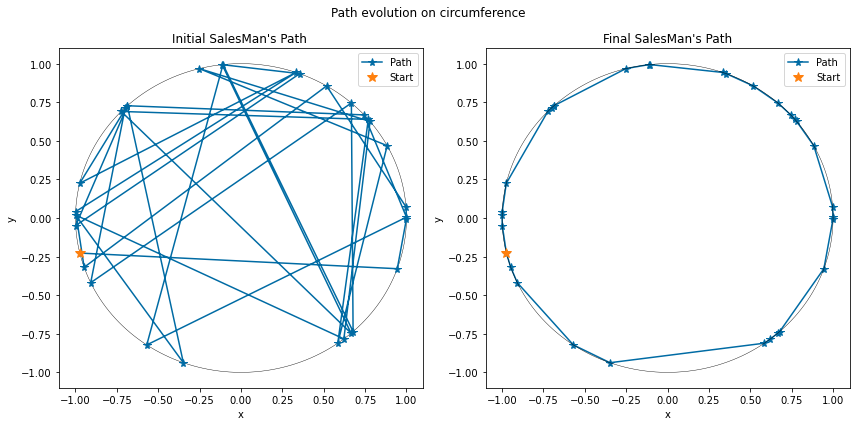

In [107]:
path('circumference')

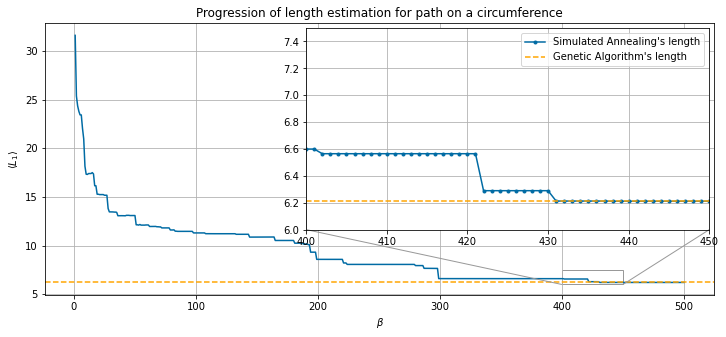

In [114]:
loss('circumference')

## Exercise 10.2: Parallel Computing & TSP problem
____________________

In this exercise we exploit the `MPI` library (more information [here](http://www.mpi-forum.org)) and use it to solve the Travelling Salesman Problem. We use 4 different nodes to run the Genetic Algorithm in a parallelized version on multiple cores: In my case, I have 4 cores in my computer.

This is the so called **Single Program Multiple Data (SPMD)** model, where the same executable is used to process different sets of data.

To perform this task, we add one last method to our `Population` class: `ParallelEvolve`, which takes care of the evolution of the algorithm and to the communication between cores while the program is running. The idea is to set an integer parameter, $n_{\text{migr}}=10$, which is the number of generations after which the 4 different processes, each running on its own core, will randomly swap among them their best `SalesMan` object. The _best_, here, is the `SalesMan` with the lowest value of the loss function, that is, the one touring on the shortest path.

The convergence speed is in good accordance with what we have already obtained with the previous methods. The convergence to the correct results, in both the square and circumference case is similar to the one obtained in the simple GA case: in fact the whole parallel calculation is similar to a crossover operation or a mutation. 

To further comment on the effective gain provided by the parallelization, one should take care of evolving the genetic algorithm on the same set of cities.

In [177]:
def paraplots(state, shape) :
    plt.subplots(figsize=(12,12))
    for j in range(4):
        plt.subplot(2,2,j+1)
        plt.title('rank = %d' %(j))
        file = './ex10.2/results/cities_'+state+'_'+shape+'_'+str(j)+'.dat'
        x,y = (np.genfromtxt(file, usecols=i, autostrip=True) for i in range(2))
        plt.plot(x,y, '*-',markersize=8, label='GA path')
        plt.plot(x[0],y[0],'*',markersize=10, label='Start')
        if  shape == 'circumference' :
            theta=np.linspace(0,2.*3.141593,num=200)    
            sinn=np.sin(theta); coss=np.cos(theta)
            plt.plot(coss,sinn,color='k',linewidth=0.4)
        plt.legend(loc=1)
        plt.xlabel('x')
        plt.ylabel('y')
    plt.suptitle(state+' SalesMan\'s Path ')
    plt.show()

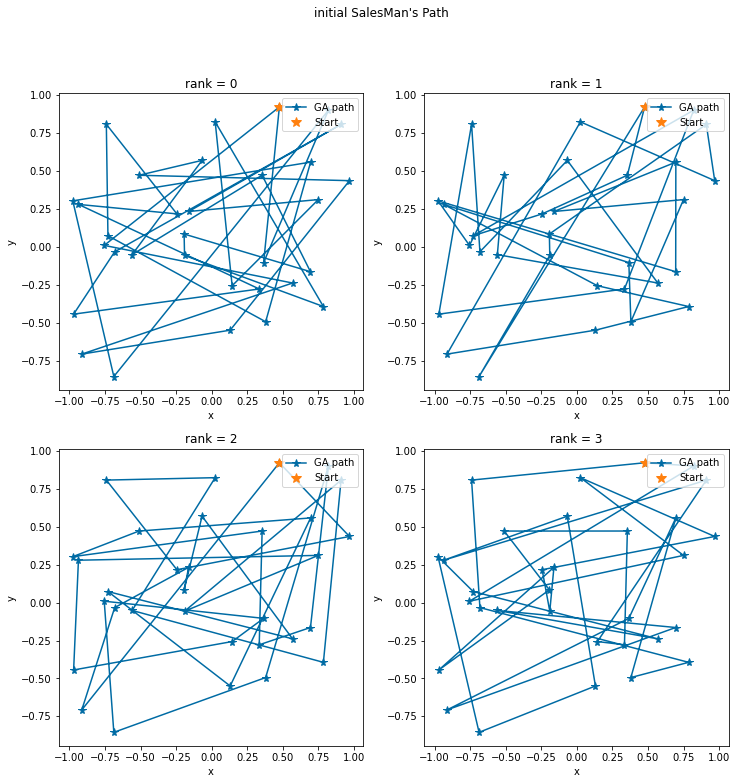

In [178]:
paraplots('initial', 'square')

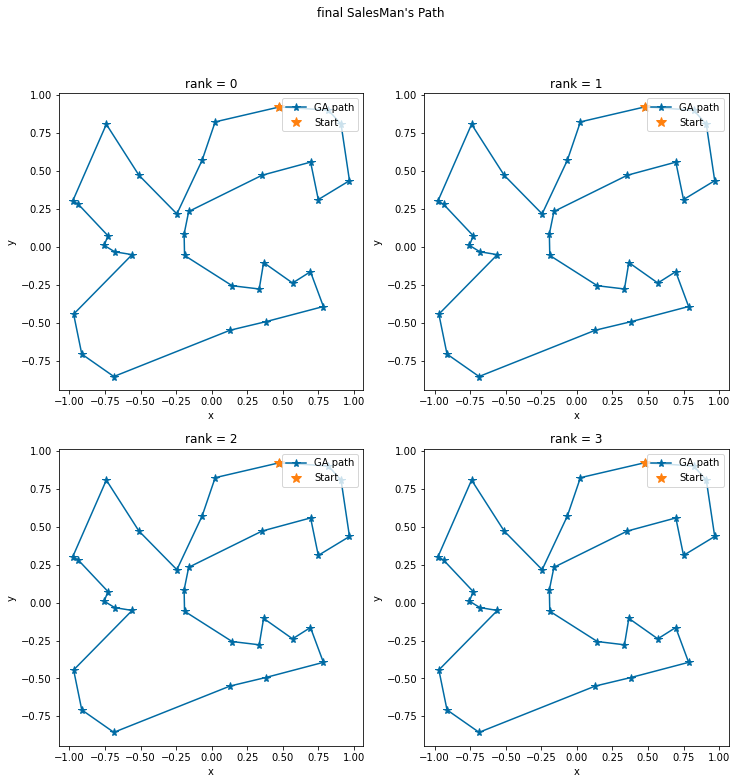

In [179]:
paraplots('final', 'square')

In [180]:
def paraloss(shape) :
    plt.subplots(figsize=(15,10))

    for j in range(4):
        plt.subplot(2,2,j+1)
        plt.title('rank = %d' %(j))

        file = './ex10.2/results/loss_'+shape+'_'+str(j)+'.dat'
        generation, fitness = (np.genfromtxt(file, usecols=i, autostrip=True) for i in range(2))
        plt.plot(generation, fitness, label="Miglior costo")

        file = './ex10.2/results/loss_ave_'+shape+'_'+str(j)+'.dat'
        generation, fitness = (np.genfromtxt(file, usecols=i, autostrip=True) for i in range(2))
        plt.plot(generation, fitness, label=r"Media dei costi, $\langle L_1\rangle$")
        plt.ylabel(r'$\langle L_1\rangle$')
        plt.xlabel('# generation')
        plt.legend(loc=1)
        plt.grid(True)
    plt.suptitle('Progression of length estimation for path on a '+shape, fontsize=18)
    plt.tight_layout()
    plt.show()

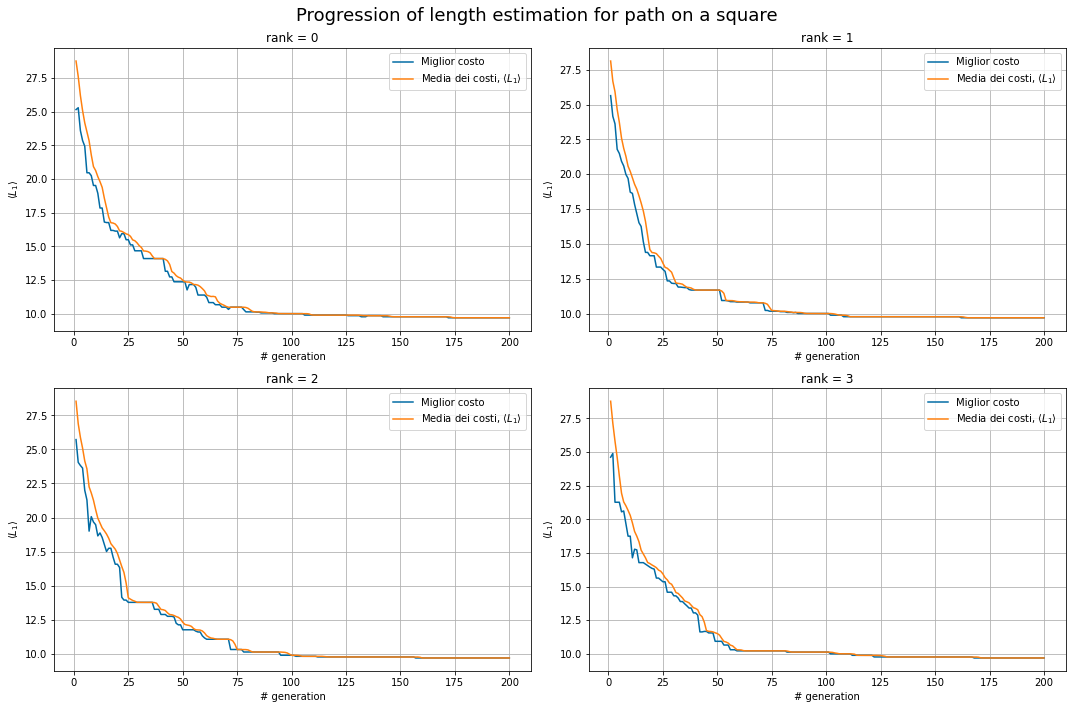

In [181]:
paraloss('square')

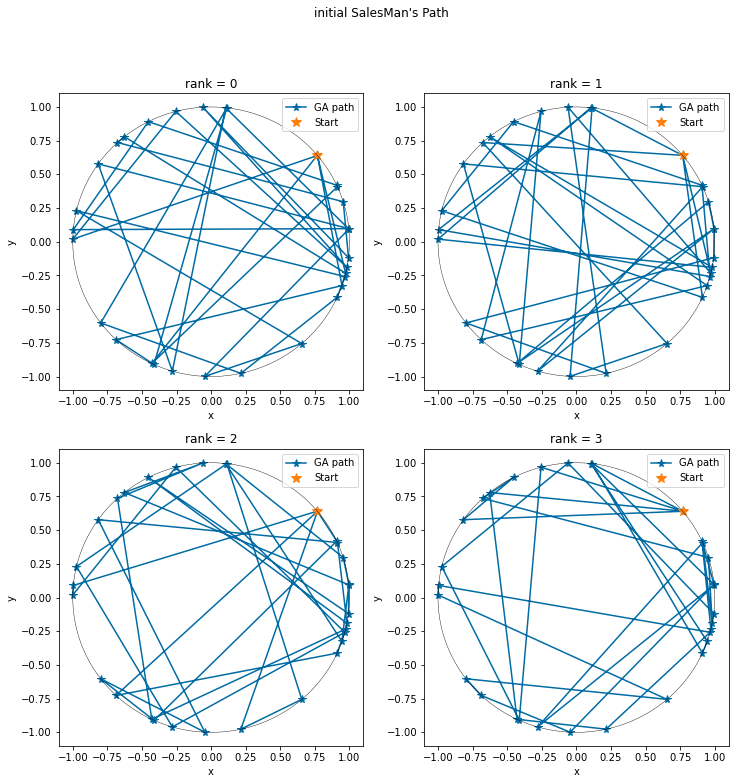

In [182]:
paraplots('initial', 'circumference')

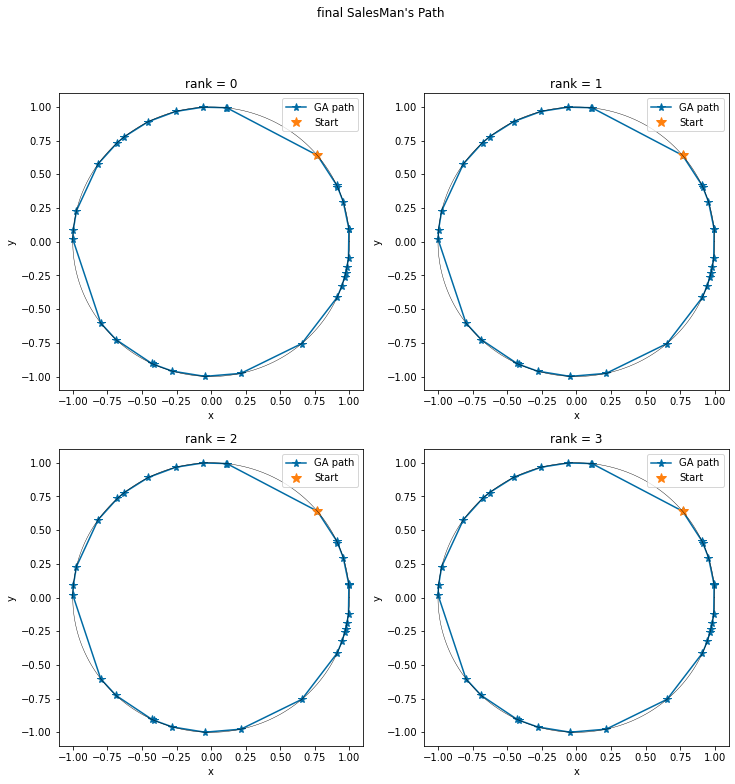

In [183]:
paraplots('final', 'circumference')

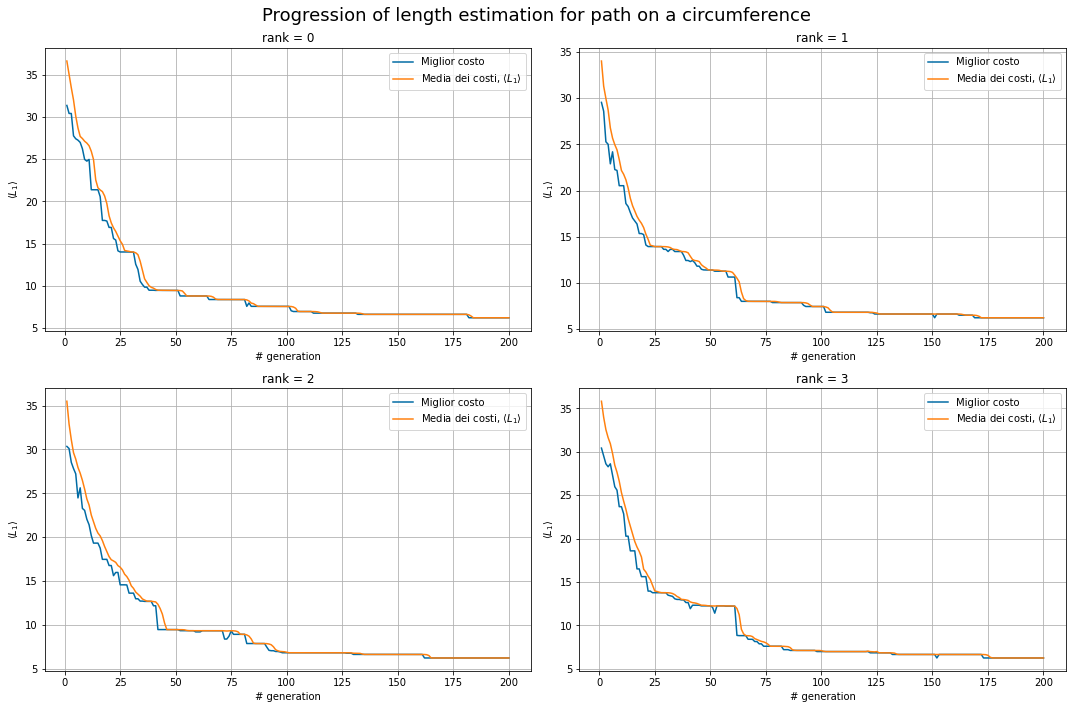

In [184]:
paraloss('circumference')